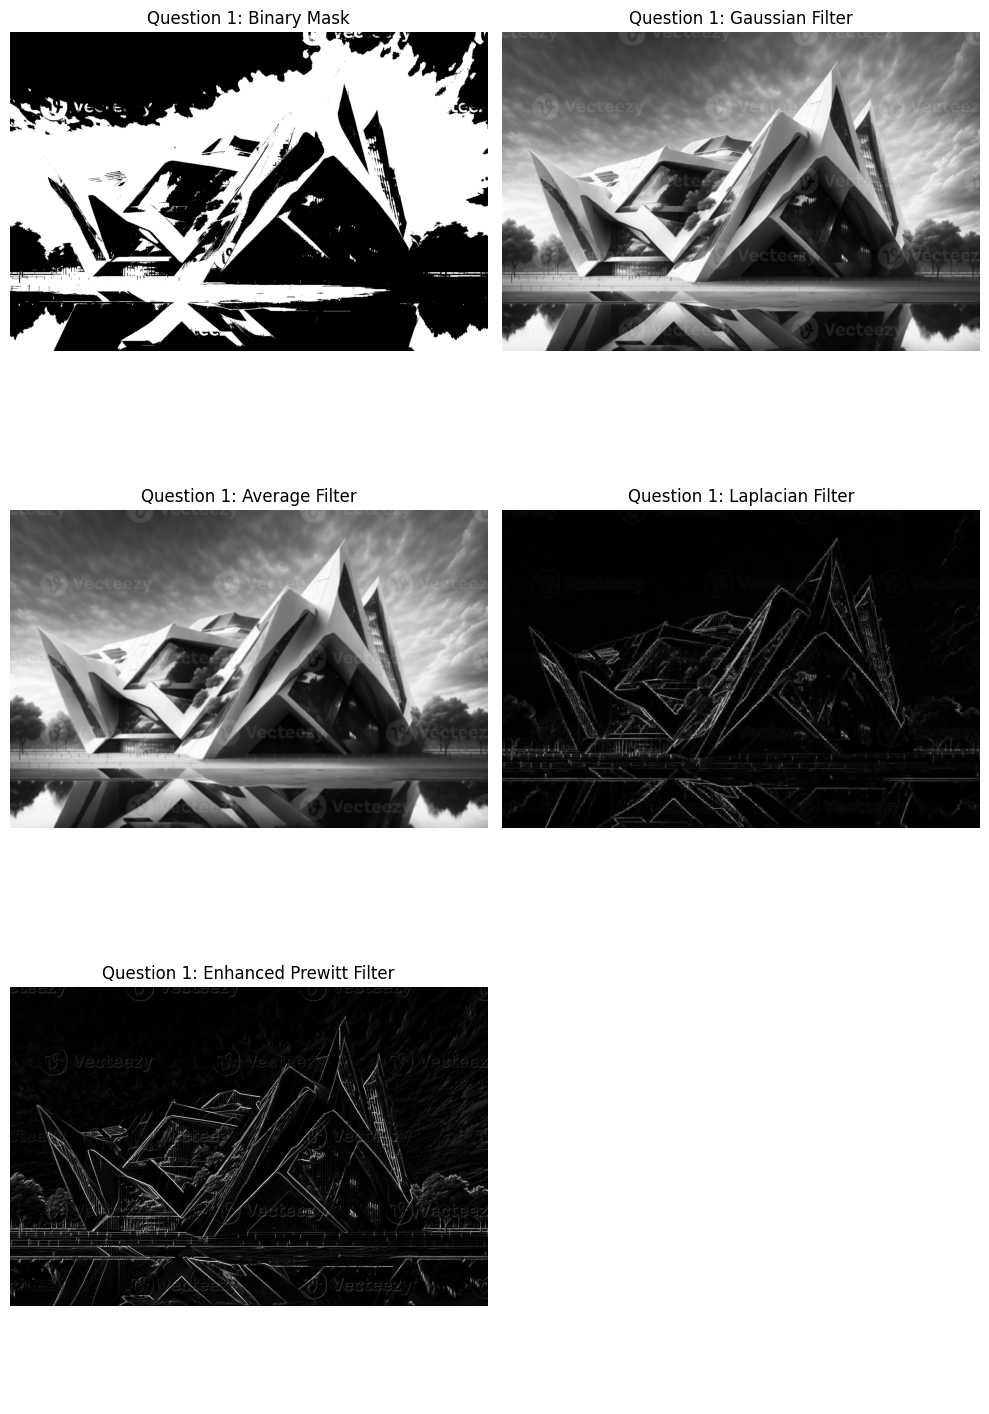

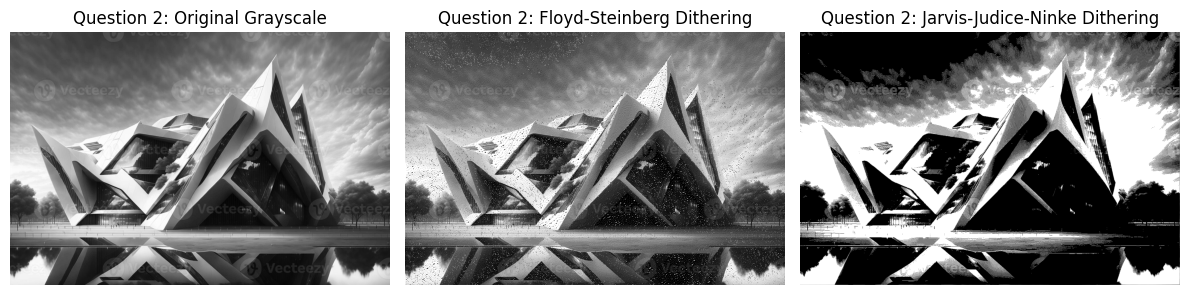

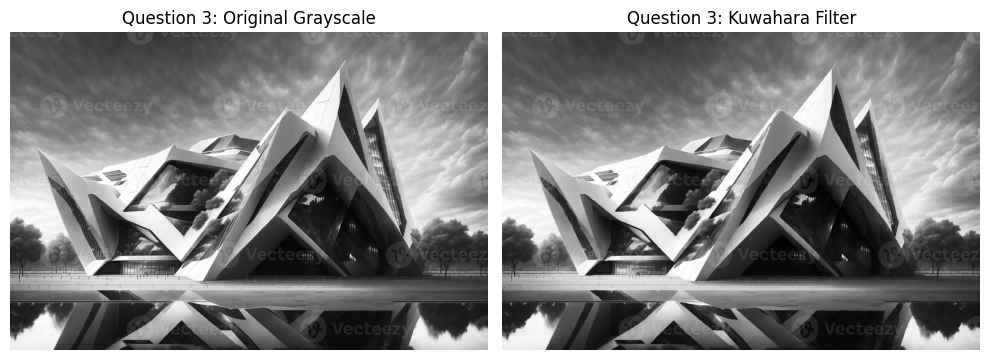

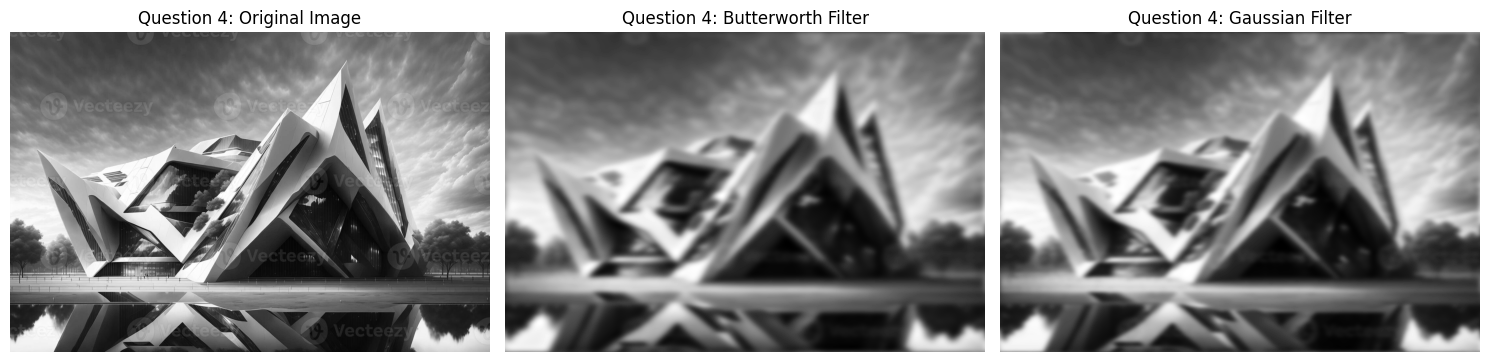

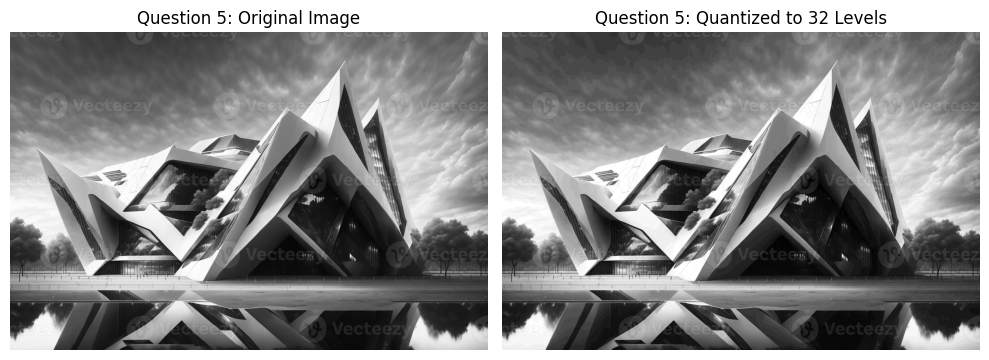

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import generic_filter

# Load the image
ki24 = cv2.imread("C:/Users/imdil/OneDrive/Desktop/dip2_kailash.jpg")
ki24_gray = cv2.cvtColor(ki24, cv2.COLOR_BGR2GRAY)

# Question 1: Apply filters and create a binary mask
# Create a binary mask for the region of interest
_, mask_ki24 = cv2.threshold(ki24_gray, 120, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Average filters (Low-pass filters)
gaussian_blur_ki24 = cv2.GaussianBlur(ki24_gray, (5, 5), 0)
average_blur_ki24 = cv2.blur(ki24_gray, (5, 5))

# Apply Laplacian and enhanced Prewitt filters (High-pass filters)
laplacian_ki24 = cv2.Laplacian(ki24_gray, cv2.CV_64F)
laplacian_ki24 = cv2.convertScaleAbs(laplacian_ki24)  # Convert back to uint8
prewitt_kernel_horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_kernel_vertical = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_horizontal_ki24 = cv2.filter2D(ki24_gray, -1, prewitt_kernel_horizontal)
prewitt_vertical_ki24 = cv2.filter2D(ki24_gray, -1, prewitt_kernel_vertical)
prewitt_ki24 = prewitt_horizontal_ki24 + prewitt_vertical_ki24
prewitt_normalized_ki24 = cv2.normalize(prewitt_ki24, None, 0, 255, cv2.NORM_MINMAX)

# Display results for Question 1
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.ravel()
ax[0].imshow(mask_ki24, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(gaussian_blur_ki24, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(average_blur_ki24, cmap='gray')
ax[2].set_title("Question 1: Average Filter")
ax[3].imshow(laplacian_ki24, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(prewitt_normalized_ki24, cmap='gray')
ax[4].set_title("Question 1: Enhanced Prewitt Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Implement Dithering Algorithms
# Load image and convert to grayscale
ki24_pil = Image.open("C:/Users/imdil/OneDrive/Desktop/dip2_kailash.jpg").convert('L')

# Floyd-Steinberg Dithering
def floyd_steinberg_dithering_ki24(image):
    pix = np.array(image)
    for i in range(image.size[1] - 1):
        for j in range(image.size[0] - 1):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j + 1 < image.size[0]:
                pix[i, j + 1] += quant_error * 7 / 16
            if i + 1 < image.size[1]:
                pix[i + 1, j] += quant_error * 5 / 16
                if j + 1 < image.size[0]:
                    pix[i + 1, j + 1] += quant_error * 1 / 16
                if j - 1 >= 0:
                    pix[i + 1, j - 1] += quant_error * 3 / 16
    return Image.fromarray(pix)

# Jarvis-Judice-Ninke Dithering
def jarvis_judice_ninke_dithering_ki24(image):
    pix = np.array(image)
    for i in range(image.size[1] - 2):
        for j in range(image.size[0] - 2):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j + k - 1 < image.size[0] and i + 1 < image.size[1]:
                    pix[i + 1, j + k - 1] += quant_error * (1 / 48 if k == 0 else 5 / 48 if k == 1 else 3 / 48)
                if j + k - 1 < image.size[0] and i + 2 < image.size[1]:
                    pix[i + 2, j + k - 1] += quant_error * (1 / 48 if k == 0 else 3 / 48 if k == 1 else 1 / 48)
    return Image.fromarray(pix)

# Apply Dithering
fs_image_ki24 = floyd_steinberg_dithering_ki24(ki24_pil)
jjn_image_ki24 = jarvis_judice_ninke_dithering_ki24(ki24_pil)

# Display results for Question 2
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(ki24_pil, cmap='gray')
ax[0].set_title("Question 2: Original Grayscale")
ax[1].imshow(fs_image_ki24, cmap='gray')
ax[1].set_title("Question 2: Floyd-Steinberg Dithering")
ax[2].imshow(jjn_image_ki24, cmap='gray')
ax[2].set_title("Question 2: Jarvis-Judice-Ninke Dithering")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 3: Kuwahara Filter
# Kuwahara filter implementation
def kuwahara_filter_ki24(image, window_size):
    hsize = window_size // 2
    padded_image = np.pad(image, hsize, mode='reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extracting the subwindow
            window = padded_image[i:i + window_size, j:j + window_size]
            # Splitting the window into 4 overlapping regions
            regions = [
                window[:hsize + 1, :hsize + 1],
                window[:hsize + 1, hsize:],
                window[hsize:, :hsize + 1],
                window[hsize:, hsize:]
            ]
            # Calculating mean and variance for each region
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            # Selecting the mean of the region with the smallest variance
            output_image[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output_image

# Apply the Kuwahara filter with a window size of 5x5
kuwahara_result_ki24 = kuwahara_filter_ki24(ki24_gray, 5)

# Display the original and Kuwahara filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ki24_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(kuwahara_result_ki24, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 4: Fourier Transform and Filtering
# Apply Fourier Transform
f_transform_ki24 = np.fft.fft2(ki24_gray)
f_shift_ki24 = np.fft.fftshift(f_transform_ki24)  # Shift the zero frequency component to the center

# Create Butterworth Low-Pass Filter
def butterworth_filter_ki24(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    butterworth = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth[u, v] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth

# Create Gaussian Low-Pass Filter
def gaussian_filter_ki24(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    gauss = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gauss[u, v] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return gauss

# Apply Butterworth Filter
butter_filter_ki24 = butterworth_filter_ki24(ki24_gray.shape, cutoff=30, order=2)
f_butter_ki24 = f_shift_ki24 * butter_filter_ki24
butter_img_ki24 = np.abs(np.fft.ifft2(np.fft.ifftshift(f_butter_ki24)))

# Apply Gaussian Filter
gauss_filter_ki24 = gaussian_filter_ki24(ki24_gray.shape, cutoff=30)
f_gauss_ki24 = f_shift_ki24 * gauss_filter_ki24
gauss_img_ki24 = np.abs(np.fft.ifft2(np.fft.ifftshift(f_gauss_ki24)))

# Display original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(ki24_gray, cmap='gray')
ax[0].set_title("Question 4: Original Image")
ax[1].imshow(butter_img_ki24, cmap='gray')
ax[1].set_title("Question 4: Butterworth Filter")
ax[2].imshow(gauss_img_ki24, cmap='gray')
ax[2].set_title("Question 4: Gaussian Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 5: Quantize Image to 32 Grayscale Levels
# Quantize to 32 grayscale levels
quantized_image_ki24 = (ki24_gray // 8) * 8  # Dividing and then multiplying to create 32 levels

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ki24_gray, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(quantized_image_ki24, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
Question 1: Binary Mask, Gaussian, Average, Laplacian and Prewitt Filters. 

Binary Mask: The binary mask was built using a threshold of 120 so the target regions were separated. It accurately demonstrates where significant parts of the image are missing and also distinguishes between masked and un-masked parts. 

Gaussian Filter: The Gaussian filter cut down the noise by blurring the picture. This smoothing was spread fairly thinly and resulted in subtle pixel value shifts, as designed. 

Average Filter: Average filter provided a smooth, uniform smoothing, which eliminated high frequency bits and detail. 

Laplacian Filter: The Laplacian filter highlighted the outlines of the architectural features, accentuated the high quality detail areas by smoothing regions of rapid intensification. 

Enhance Prewitt Filter: The advanced Prewitt filter applied horizontally and vertically to notch the edges. The end product is strikingly opposite, and structural limits are discernible. 

In general, all the filters were working fine. These showed clearly the expected effects of low-pass and high-pass filtering. 

Question 2: Floyd-Steinberg and Jarvis-Judice-Ninke Dithering. 

Floyd-Steinberg Dithering: dithering spreads the errors over adjacent pixels so that the grayscale image is visually balanced. The method generated an easily distributed pattern of dithering, which did not alter the architecture’s details. 

Jarvis-Judice-Ninke Dithering: Compared to Floyd-Steinberg, the Jarvis-Judice-Ninke dithering algorithm produced a stronger impact. The result maintained brightness contrast across bright and dark areas while using a sophisticated error diffusion algorithm. 

Both dithering approaches returned proper outputs showing expected error diffusion variations. Floyd-Steinberg made the move smoother, while Jarvis-Judice-Ninke made it more contrasty. 

Question 3: Kuwahara Filter 

Explain: This Kuwahara filter minimizes noise and retains edges by splitting the image into sub-regions and repurposing the lowest variance region. This ensures the retention of key elements and decrease distortions. 

Context: Applying the Kuwahara filter resulted in drastic reduction of noise while keeping the details of the buildings. The building’s fabric is not destroyed, and you can only see the smoothing – mostly in spots of predictable strength. 

The use of Kuwahara filter was able to reconcile noise and detail while getting the edge-sensitised smoothing effect that one expects. 

Question 4: Fourier Transform, Butterworth, and Gaussian Filters. 

Butterworth Filter: Butterworth filter applied to the Fourier transform gave a soft low-pass filtering. The smoothness and brightness shifted back and forth between filtered and unfiltered segments with an even blend between sharpness and smoothness. 

Gaussian Filter: The Gaussian low-pass filter produced more noticeable blurring than the Butterworth filter. The filtering was also very good in removing high-frequency noise to produce a soft image. 

It turned out that the two filters did what they were meant to, with Butterworth giving a slightly smoother transition and Gaussian giving more noticeable blur. 

Question 5: Grayscale Quantification to 32 Dimensions. 

Results: The image was quantified down to 32 greyscale levels, so that there are less distinct intensity values but still the overall structure of the image. The quantified image showed sharp granular distinctions between intensity ranges, and was reduced to the familiar shape of the original. 

Quantization was effective as the grayscale levels were lowered visually while key features of the image were preserved and visual complexity decreased.